In [1]:
%matplotlib inline 
#Импротируем необходимые функции
import numpy as np # работа с массивами и линейной алгеброй
import matplotlib.pyplot as plt # для отрисовки графиков
import scipy.linalg as la # функции линейной алгебры
import math as math

### Задача №4.3. Интерполяционный многочлен в форме Ньютона.

In [2]:
#Зададим интерполируемую функцию
f = lambda x: np.exp(np.sin(x))

#Зададим количество узлов и границы отрезка
n = 10
left = 0
right = 10

In [3]:
#Функция, для вычисления узлов Чебышева
def Chebyshev_nodes(left, right, n):
    i = np.arange(n)
    x_n = (left + right + (right - left) * np.cos(np.pi/(2*n) + np.pi * i / n))/2
    return x_n

In [4]:
#Зададим сетку и вычислим значения интерполируемой функции в узлах интерполяции
#Равномерная сетка
x1 = np.linspace(left, right, n)
y1 = f(x1)
#print(y1)

#Чебышевская сетка
x2 = Chebyshev_nodes(left, right, n)
y2 = f(x2)
print(x2)
print(y2)

[9.9384417  9.45503262 8.53553391 7.2699525  5.78217233 4.21782767
 2.7300475  1.46446609 0.54496738 0.0615583 ]
[0.61178677 0.97020291 2.17405856 2.30308103 0.61858896 0.41470949
 1.4918634  2.70297296 1.67932209 1.06345115]


In [5]:
#Функция для вычисления таблицы разделенных разностей.
def Divided_differences(x, y):
    F = np.zeros((n,n))
    for i in range(n):
        F[i][0] = y[i]
        for j in range(1, i+1):
            F[i][j] = (F[i][j-1] - F[i-1][j-1]) / (x[i] - x[i-j])
    #print(F)
    return F

In [6]:
#Построим таблицы разделенных разностей.
F1 = Divided_differences(x1, y1)
F2 = Divided_differences(x2, y2)

In [7]:
#Функция для вычисления значения интерполяционного многочлена в форме Ньютона в точке x0
def Newton_polynomial(F, x, x0):
    result = F[0][0]
    tmp = 1
    for i in range(n-1):
        tmp *= (x0 - x[i])
        result += F[i+1][i+1] * tmp
    return result

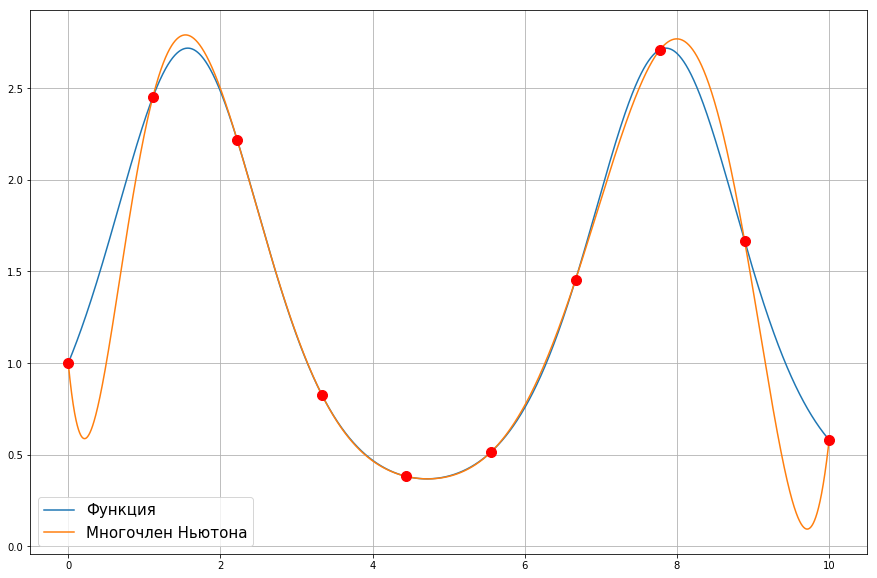

In [8]:
#Построим график по равномерной сетке
N = 5000
xx = np.linspace(left, right, N)

plt.figure(figsize=(15,10))
plt.plot(xx, f(xx), label = 'Функция')
plt.plot(xx,  Newton_polynomial(F1, x1, xx), label = 'Многочлен Ньютона')
plt.plot(x1, y1, 'ro', ms = 10)
plt.legend(fontsize = 15)
plt.grid()
plt.show()

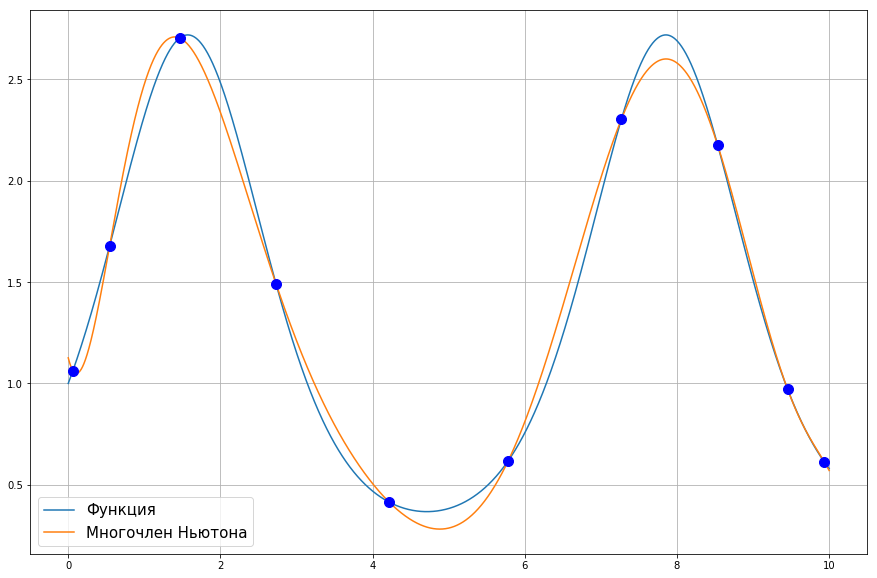

In [9]:
#Построим график по чебышевской сетке
N = 5000
xx = np.linspace(left, right, N)

plt.figure(figsize=(15,10))
plt.plot(xx, f(xx), label = 'Функция')
plt.plot(xx,  Newton_polynomial(F2, x2, xx), label = 'Многочлен Ньютона')
plt.plot(x2, y2, 'bo', ms = 10)
plt.legend(fontsize = 15)
plt.grid()
plt.show()

### Функция, которая вычисляет значение первой производной интерполяционного многочлена в точке $x$.

In [10]:
#Функция для вычисления производной интерполяционного многочлена в точке х0
def diff_polynomial(F, x, x0):
    result = 0
    tmp1 = 1
    tmp2 = 0
    for i in range(n-1):
        tmp2 = tmp2 * (x0 - x[i]) + tmp1
        tmp1 = tmp1 * (x0 - x[i])
        result += F[i+1][i+1] * tmp2
    return result

In [11]:
#функция для вычисления производной функции в точке х0 по определению
def diff(f, x0):
    eps = 0.000000001
    result = (f(x0 + eps) - f(x0)) / eps
    return result

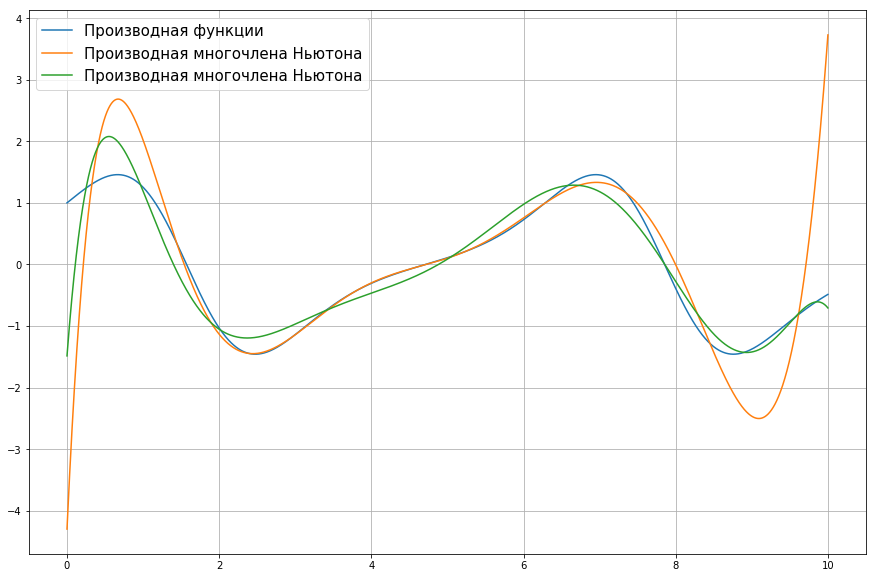

In [12]:
N = 5000
xx = np.linspace(left, right, N)

plt.figure(figsize=(15,10))
plt.plot(xx, diff(f, xx), label = 'Производная функции')
#plt.plot(xx, np.exp(np.sin(xx)) * np.cos(xx), label = 'истинная производная')
plt.plot(xx, diff_polynomial(F1, x1, xx), label = 'Производная многочлена Ньютона')
plt.plot(xx, diff_polynomial(F2, x2, xx), label = 'Производная многочлена Ньютона')
plt.legend(fontsize = 15)
plt.grid()
plt.show()